/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



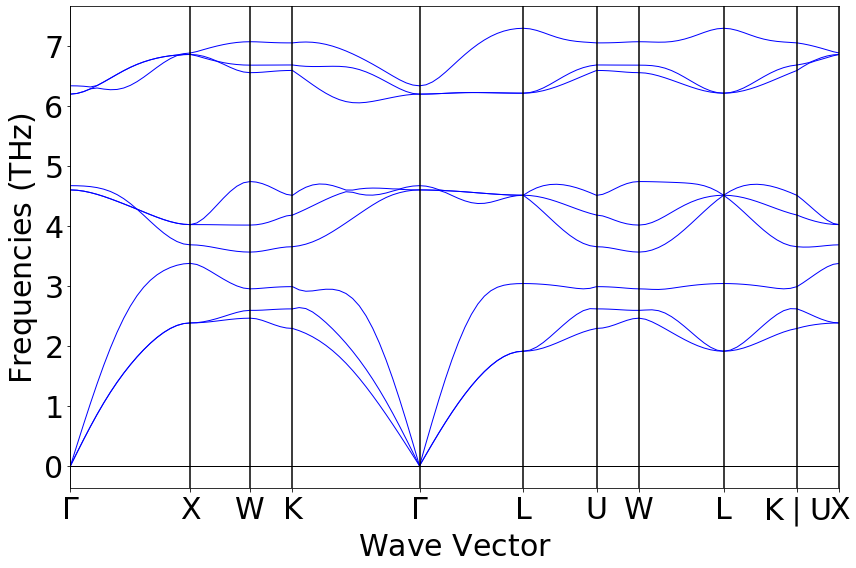

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure 
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.io.phonopy import get_ph_bs_symm_line
import matplotlib.pyplot as plt
import numpy as np

with MPRester("7dRNB3pyHFTcJ6LC") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-2894")
    
    # Téléchargement de la structure de bande de phonons du TiCoSb
    bs_phonon = m.get_phonon_bandstructure_by_material_id("mp-2894")
    bsplotter = PhononBSPlotter(bs_phonon)
    bsplotter.show()

In [2]:
#Données nécessaires pour le calcul de la vitesse du son
data = bsplotter.bs_plot_data()
f = data['frequency']
d = data['distances']

In [3]:
#Direction Γ-X
q0 = d[0][0]/1e-10   #On divise par 1e-10 pour convertir le vecteur d'onde q de Å vers m^(-1)
q1 = d[0][1]/1e-10  

f0 = f[0][1][0]*1e12 #On multiplie par 1e12 pour convertir la fréquence f de THz en Hz 
f1 = f[0][1][1]*1e12

vs1 = 2 * np.pi * np.abs((f1-f0)/(q1-q0))

print("La vitesse du son de la branche acoustique considérée dans la direction Γ-X vaut: {0:.3f} m/s".format(vs1))

La vitesse du son de la branche acoustique considérée dans la direction Γ-X vaut: 2583.784 m/s


In [4]:
#Direction Γ-K
q0 = d[3][-1]/1e-10  
q1 = d[3][-2]/1e-10  

f0 = f[3][0][-2]*1e12
f1 = f[3][0][-1]*1e12

vs2 = 2 * np.pi * np.abs((f1-f0)/(q1-q0))

print("La vitesse du son de la branche acoustique considérée dans la direction Γ-K vaut: {0:.3f} m/s".format(vs2))

La vitesse du son de la branche acoustique considérée dans la direction Γ-K vaut: 2015.542 m/s


In [5]:
#Direction Γ-L
q0 = d[4][0]/1e-10  
q1 = d[4][1]/1e-10  

f0 = f[4][2][0]*1e12  
f1 = f[4][2][1]*1e12

vs3 = 2 * np.pi * np.abs((f1-f0)/(q1-q0))

print("La vitesse du son de la branche acoustique considérée dans la direction Γ-L vaut: {0:.3f} m/s".format(vs3))

La vitesse du son de la branche acoustique considérée dans la direction Γ-L vaut: 4491.927 m/s


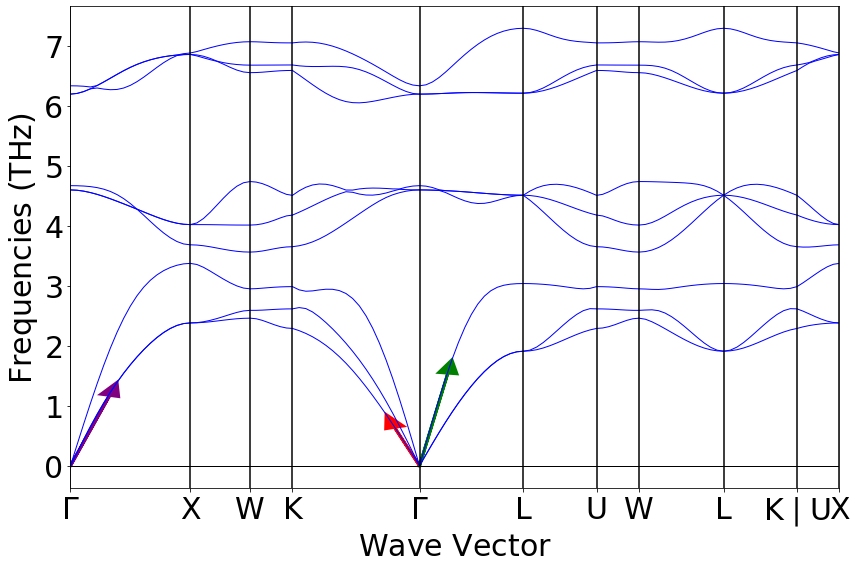

In [6]:
#Représentation graphique 
bsplotter.get_plot()

#Pente Γ-X en mauve: 
plt.arrow(d[0][0], f[0][1][0], d[0][7]-d[0][0], f[0][1][7]-f[0][1][0], head_width=0.15, linewidth=3, length_includes_head=True, color='purple')
#Pente Γ-K en rouge: 
plt.arrow(d[3][-1], f[3][0][-1], d[3][14]-d[3][-1], f[3][0][14]-f[3][0][-1], head_width=0.15, linewidth=3, length_includes_head=True, color='red')
#Pente Γ-L en vert: 
plt.arrow(d[4][0], f[4][2][0], d[4][5]-d[4][0], f[4][2][5]-f[4][2][0], head_width=0.15, linewidth=3, length_includes_head=True, color='green')
plt.show()